In [ ]:
''' 
Implementing linear regression with multiple variables to predict the prices of houses
'''

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [20]:
def load_housing_portland_dataset(filename='data_housing_portland.txt', delimiter=','):
    '''datas about housing in portland'''
    data = np.genfromtxt(filename, delimiter=delimiter)
    x, y = data[:, 0:2], data[:, 2].reshape(-1,1)
    return x, y

In [13]:

def feature_normalize(X):
    """A vectorized implementation of feature normalization.
    Arguments:
    - X: The raw input features, a 2d array of shape (m, n)
        
    Outputs:
    - X_norm: The normalized version of the input matrix
    - mu: The mean of the features
    - sigma: The std dev of the features  
    befor transformaton :
    we put axis=0 because we are going to calulate mean and std on colums not rows"""
    
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    
    return X_scaled, X.mean(axis=0),X.std(axis=0)

In [14]:
    
def h(X, theta):
    """ Hypothesis function for linear regression.
    
    Arguments:
        - X: Input matrix, a 2d array of shape (m, n+1)
        - theta: parameters, a 2d array of shape (n+1, 1)
        
    Output:
        - Predictions for input data (m-by-1)
    """
    return X@theta

In [18]:
def compute_cost_multi(X, Y, theta):
    """ A vectorized implementation of MSE cost function
    
    Arguments:
        - X: Inputs, a 2d array of shape (m, n + 1)
        - y: Target values, a 2d array of shape (m, 1)
        - theta: Parameters, a 2d array of shape (n + 1, 1)
        
    Outputs:
        - the mean squared error value
    """
    m, n = X.shape
    M=h(X, theta)-Y
    L=M@M.T
    return (1/2)*(L.sum()+0.01*np.sum(theta**2))

In [19]:
def gradient_descent_vectorized(X, Y, theta, alpha, num_iterations):
    """ A vectorized implementation of full-batch gradient descent.
    
    Arguments:
        - X: Inputs, a 2d array of shape (m, n + 1)
        - y: Target values, a 2d array of shape (m, 1)
        - theta: Initial guess for parameters, a 2d array of shape (n + 1, 1)
        - alpha: Learning rate (or step size) in G.D. algorithm
        - num_iterations: Maximum number of iterations in G.D. algorithm
        
    Outputs:
        - J_history: a list of computed costs during G.D. algorithm
        - theta: the final value of parameters after learning
    """
    m, n = X.shape
    J=[]
    for iteration in range(num_iterations):
        
        # print cost every 100 iterations
        if iteration % 100 == 0:
            print('%4d: J(%s) = %.2f' %(iteration, theta.ravel(), 
            compute_cost_multi(X, Y, theta)))
            J.append([iteration, compute_cost_multi(X, Y, theta)])
           

        
        # compute gradients

        M0=h(X, theta)-Y
        M=M0.flatten()
        grads=np.dot(M.T, X)
        grads=grads.reshape(-1,1)
        theta=theta-(grads*(alpha/m ))
        # update parameters  
            
    return J, theta


  

   0: J([-0.39234167  1.17731526 -0.27559368]) = 127990615212959.88
 100: J([215810.47318164  61446.74879475  20069.75933164]) = 17148141011102.89
 200: J([294804.22956134  83217.35712223  15219.750088  ]) = 2297502357086.05
 300: J([323718.49915497  93537.22663981   8412.17332003]) = 307818618787.79
 400: J([334302.05695053  99411.57479256   3266.88920916]) = 41241438460.42
 500: J([ 3.38175981e+05  1.03032205e+05 -2.02405150e+02]) = 5525514515.60
 600: J([339593.96302173 105328.70542293  -2467.49252974]) = 740306638.22
 700: J([340112.99015848 106799.40647686  -3931.67293811]) = 99186042.68
 800: J([340302.97087652 107744.2203242   -4875.13326268]) = 13288913.75
 900: J([340372.50996355 108351.80941611  -5482.44139716]) = 1780444.34
1000: J([340397.96351838 108742.66510229  -5873.23876361]) = 238543.35
1100: J([340407.28034265 108994.12513884  -6124.68669444]) = 31959.96
1200: J([340410.69060165 109155.90944133  -6286.46848408]) = 4281.99
1300: J([340411.93886674 109259.99933957  -63

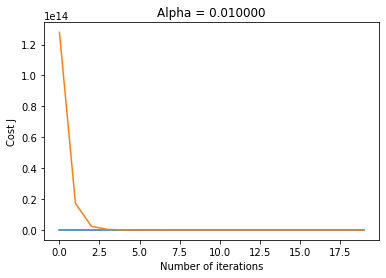

In [17]:
    X, y = load_housing_portland_dataset(filename='data_housing_portland.txt')
    X_norm, mu, sigma=feature_normalize(X)
    X = np.c_[np.ones((X.shape[0], 1)), X_norm]
    Y=y/1000
    m, n = X.shape
    theta = np.random.randn(3, 1)
    alpha = 0.01
    num_iterations =2000

    J_history, theta = gradient_descent_vectorized(X, y, theta, alpha, num_iterations)
    
    # print the final value of parameters
    print(f"The best parameters =%s "  %theta.ravel())
   
    
    # plot cost versus iteration
    plt.plot(J_history)
    plt.title("Alpha = %f" % (alpha))
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost J')
    plt.show()